In [1]:
%matplotlib inline
#%matplotlib notebook

In [2]:
import cytoflow as flow
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
matplotlib.rc('figure', dpi = 160)

# Import samples and specify experimental condtions

In [3]:
inputs = [
    #["Experiment_Tube_001_001.fcs",0],
    ["Experiment_Tube_002_002.fcs",50],
    ["Experiment_Tube_003_003.fcs",25],
    ["Experiment_Tube_004_004.fcs",100],


 
]

       
tubes = []
for filename, pct in inputs:
    tubes.append(flow.Tube(file = 'data/' + filename, conditions = {'PCT' : pct}))
    
ex = flow.ImportOp(conditions = {'PCT' : 'int'},
                   tubes = tubes).apply()
       


In [4]:
flow.set_default_scale("log")

# Plot FITC-A histograms for all IPTG and AHL induction conditions

C:\Users\Jonathan\anaconda3\envs\cytoflow\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10


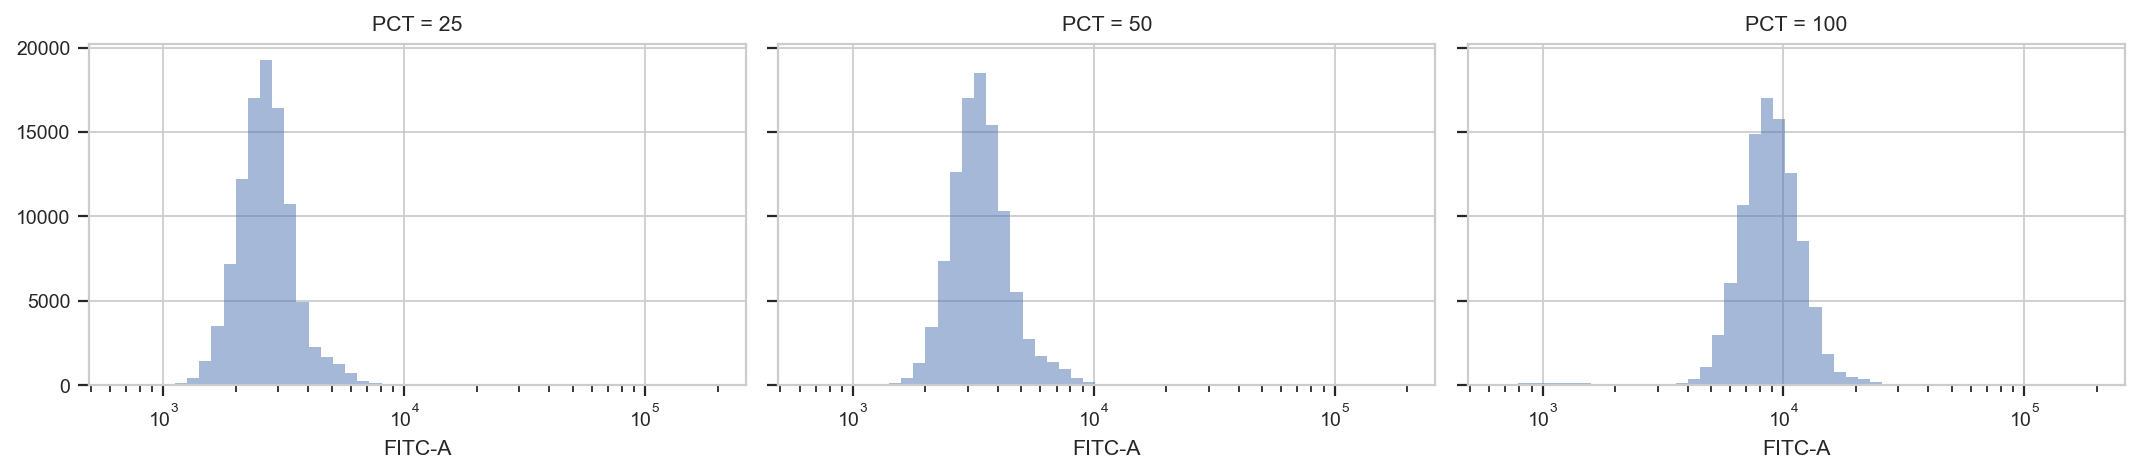

In [5]:

flow.HistogramView(channel = "FITC-A",
                   xfacet = "PCT").plot(ex)

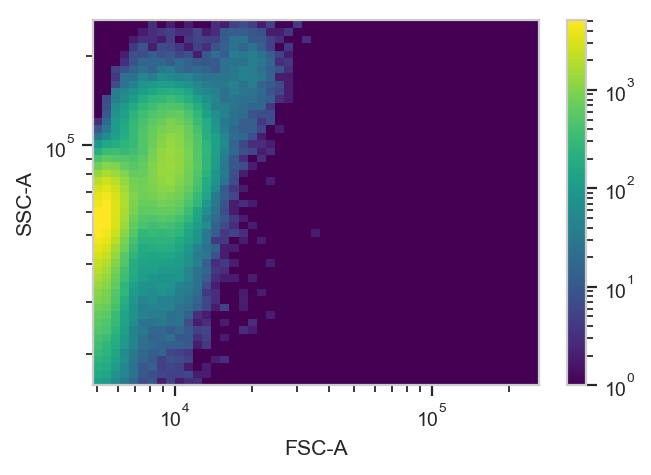

In [6]:
flow.DensityView(xchannel = "FSC-A", 
                 ychannel = "SSC-A",
                 xscale = 'log',
                 yscale = 'log').plot(ex, min_quantile = 0.005)

# Singlet gating to remove doublets

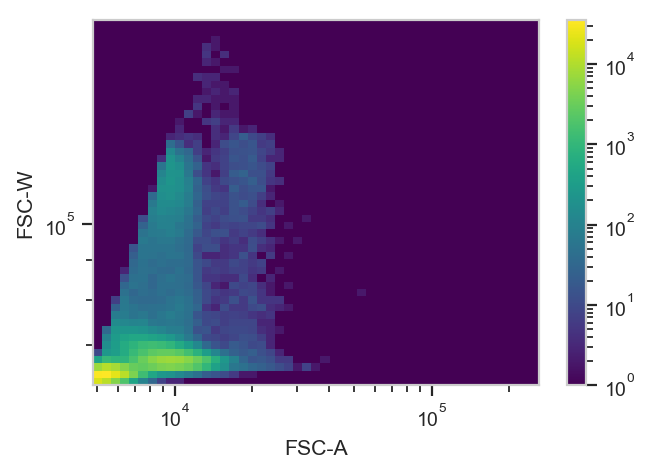

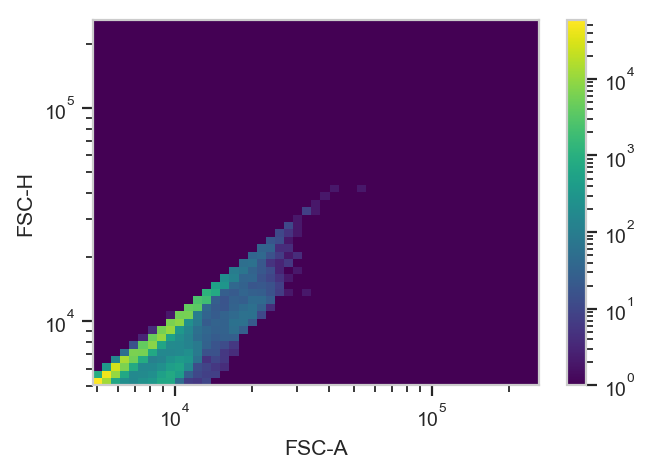

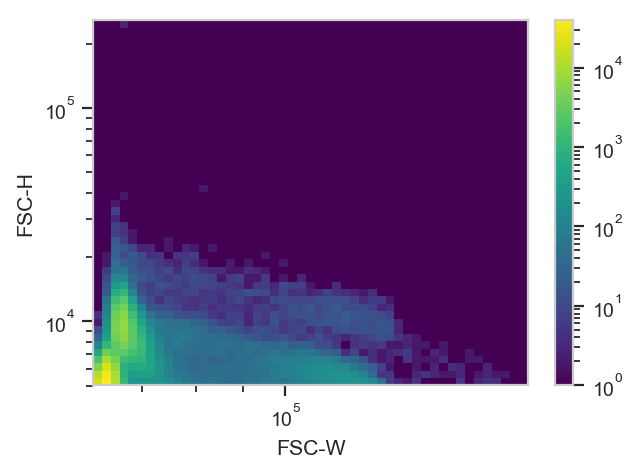

In [7]:

#channels = ['FSC-A','FSC-W','FSC-H','SSC-A','SSC-W','SSC-H']
#perm = combinations(channels,2)
FSC = [('FSC-A','FSC-W'),('FSC-A','FSC-H'),('FSC-W','FSC-H')]

#f, axes = plt.subplots(ncols=4,nrows=4)
#axs = axes.ravel()
for i,(x,y) in enumerate(FSC):  
    flow.DensityView(xchannel = x, 
                ychannel = y,
                xscale = 'log',
                yscale = 'log').plot(ex, min_quantile = 0.005)


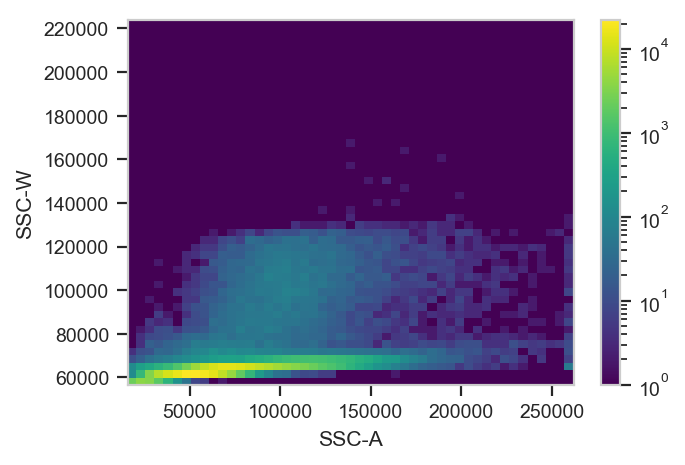

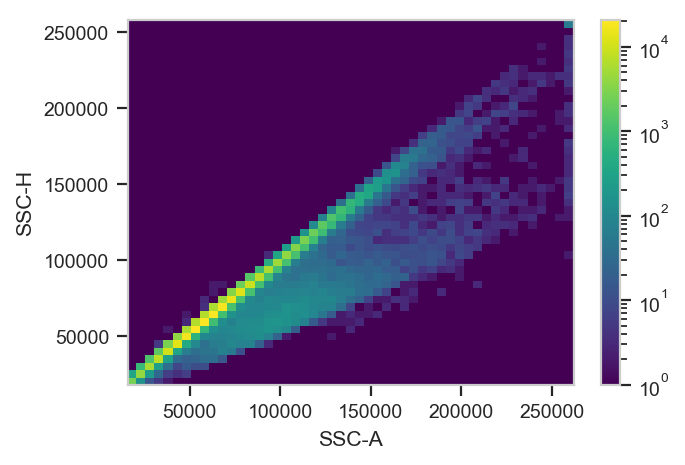

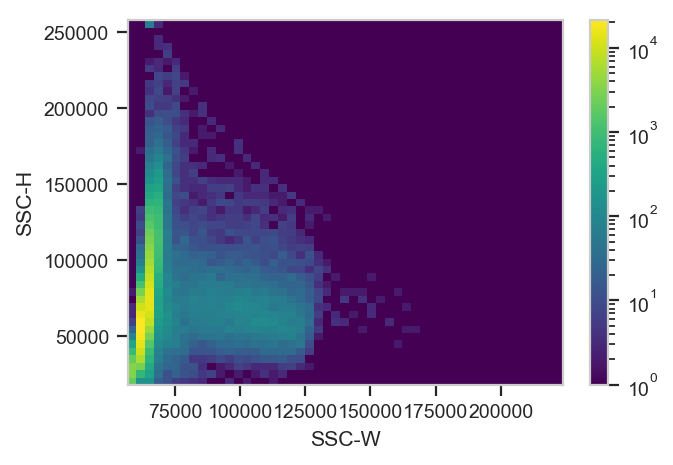

In [8]:
SSC = [('SSC-A','SSC-W'),('SSC-A','SSC-H'),('SSC-W','SSC-H')]
for i,(x,y) in enumerate(SSC):  
    flow.DensityView(xchannel = x, 
                ychannel = y,
                xscale = 'linear',
                yscale = 'linear').plot(ex, min_quantile = 0.005)

## Create and store singlet gate

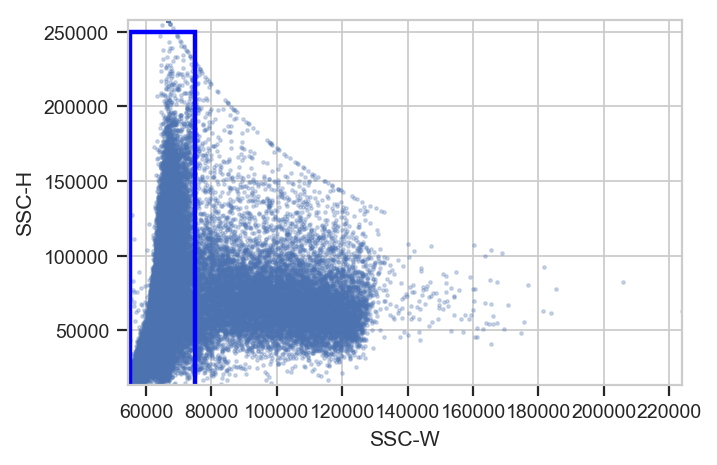

In [9]:
r = flow.Range2DOp(name = "Range2D",
                   xchannel = "SSC-W",
                   xlow = 55000,
                   xhigh = 75000,
                   ychannel = "SSC-H",
                   ylow = 5000,
                   yhigh = 250000)
                   
rv = r.default_view(xscale ='linear',yscale='linear')

rv.plot(ex)
ex2 = r.apply(ex)

## Use a gaussian mixture model to further gate the population

C:\Users\Jonathan\anaconda3\envs\cytoflow\lib\site-packages\cytoflow\operations\base_op_views.py:342: CytoflowViewWarning: Setting 'huefacet' to 'GM_1'


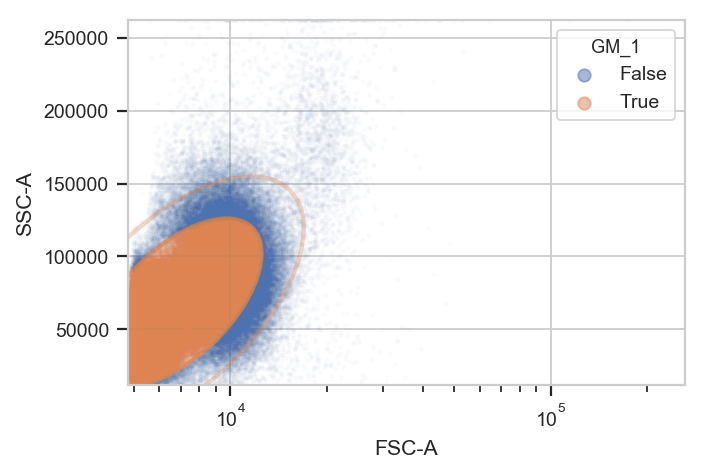

In [10]:
gm = flow.GaussianMixtureOp(name = "GM",
                            channels = ['FSC-A', 'SSC-A'],
                            scale = {'FSC-A' : 'log',
                                     'SSC-A' : 'linear'},
                            num_components = 1,
                            sigma = 2)
gm.estimate(ex2)
ex_gm = gm.apply(ex2)
gm.default_view().plot(ex_gm, alpha = 0.02)

C:\Users\Jonathan\anaconda3\envs\cytoflow\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10
C:\Users\Jonathan\anaconda3\envs\cytoflow\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10
C:\Users\Jonathan\anaconda3\envs\cytoflow\lib\site-packages\cytoflow\operations\gaussian.py:529: RuntimeWarning: invalid value encountered in less_equal
C:\Users\Jonathan\anaconda3\envs\cytoflow\lib\site-packages\cytoflow\operations\base_op_views.py:342: CytoflowViewWarning: Setting 'huefacet' to 'GM3_1'


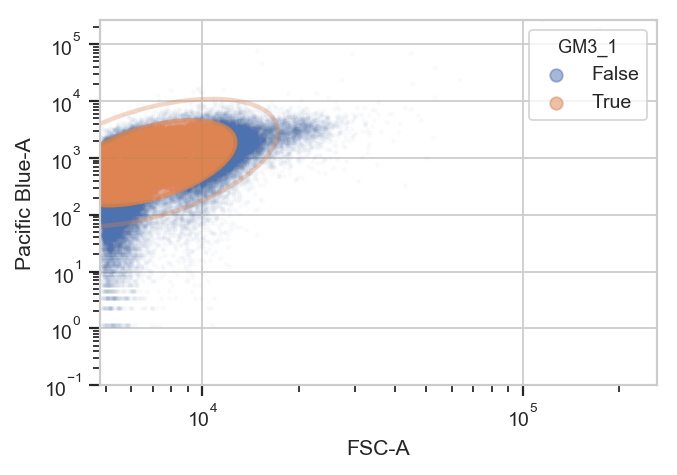

In [11]:
gm3 = flow.GaussianMixtureOp(name = "GM3",
                            channels = ['FSC-A', 'Pacific Blue-A'],
                            scale = {'FSC-A' : 'log',
                                     'Pacific Blue-A' : 'log'},
                            num_components = 1,
                            sigma = 2)
gm3.estimate(ex_gm)
ex_gm2 = gm3.apply(ex_gm)
gm3.default_view().plot(ex_gm2, alpha = 0.02)

In [12]:
df =ex_gm2.data

# filter out events that don't fall within the gates

In [13]:

df = df[(df.GM_1==True) & (df.GM3_1==True) & (df.Range2D==True) & (df['FITC-A'] >0)]
df

,FITC-A,FITC-H,FITC-W,FSC-A,FSC-H,FSC-W,PCT,Pacific Blue-A,Pacific Blue-H,Pacific Blue-W,PerCP-Cy5-5-A,PerCP-Cy5-5-H,SSC-A,SSC-H,SSC-W,Time,Range2D,GM_1,GM3_1
0,3835.010010,3759.0,66861.187500,5473.780273,5739.0,62507.347656,50,393.299988,657.0,39231.820312,6854.779785,7585.0,47113.039062,50863.0,60704.250000,43.299999,True,True,True
1,3172.849854,3593.0,57872.503906,5732.040039,5941.0,63230.933594,50,511.750000,372.0,90156.039062,8040.259766,7822.0,58772.039062,61958.0,62166.058594,43.400002,True,True,True
2,3021.550049,3248.0,60966.843750,5758.680176,5972.0,63195.058594,50,1582.400024,1599.0,64855.640625,11245.149414,10891.0,66355.726562,69376.0,62682.902344,43.400002,True,True,True
3,3669.469971,4067.0,59130.164062,5682.459961,5847.0,63691.757812,50,721.049988,553.0,85451.593750,9061.089844,8953.0,63800.539062,67111.0,62303.230469,43.400002,True,True,True
4,3089.189941,3464.0,58444.906250,5168.899902,5372.0,63058.273438,50,1052.250000,900.0,76622.507812,8044.709961,8192.0,51421.527344,53596.0,62877.105469,43.400002,True,True,True
5,3054.479980,3456.0,57921.988281,5082.319824,5140.0,64800.566406,50,750.950012,713.0,69024.203125,11331.479492,11785.0,43351.898438,46852.0,60640.101562,43.400002,True,True,True
6,2726.959961,2908.0,61456.003906,5170.379883,5384.0,62935.738281,50,358.799988,743.0,31647.800781,9278.250000,9367.0,19260.490234,21772.0,57976.089844,43.400002,True,True,True
7,2277.510010,2353.0,63433.445312,5478.959961,5749.0,62457.664062,50,886.649963,780.0,74496.781250,11566.439453,11884.0,49047.007812,52881.0,60784.488281,43.400002,True,True,True
8,3238.709961,3680.0,57677.199219,5980.680176,6244.0,62772.242188,50,1294.900024,1593.0,53272.171875,10346.250000,10105.0,63813.890625,67300.0,62141.265625,43.500000,True,True,True
9,1439.130005,1606.0,58726.542969,5053.459961,5346.0,61949.785156,50,236.899994,825.0,18818.759766,9165.219727,9965.0,51410.847656,55270.0,60960.039062,43.500000,True,True,True


In [18]:
data = df[['FITC-A','PCT']]
mfi = data.groupby(['PCT'])['FITC-A'].median().reset_index()


In [19]:
# Add first tube back to dataset

C:\Users\Jonathan\anaconda3\envs\cytoflow\lib\site-packages\cytoflow\operations\base_op_views.py:342: CytoflowViewWarning: Setting 'huefacet' to 'GM_1'
C:\Users\Jonathan\anaconda3\envs\cytoflow\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10
C:\Users\Jonathan\anaconda3\envs\cytoflow\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10
C:\Users\Jonathan\anaconda3\envs\cytoflow\lib\site-packages\cytoflow\operations\gaussian.py:529: RuntimeWarning: invalid value encountered in less_equal
C:\Users\Jonathan\anaconda3\envs\cytoflow\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


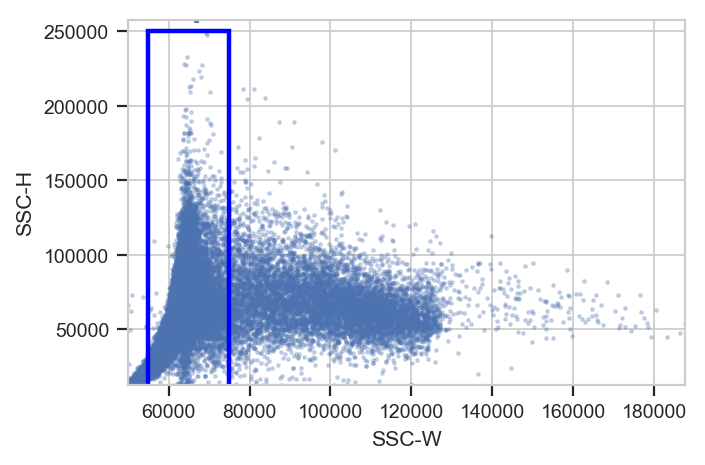

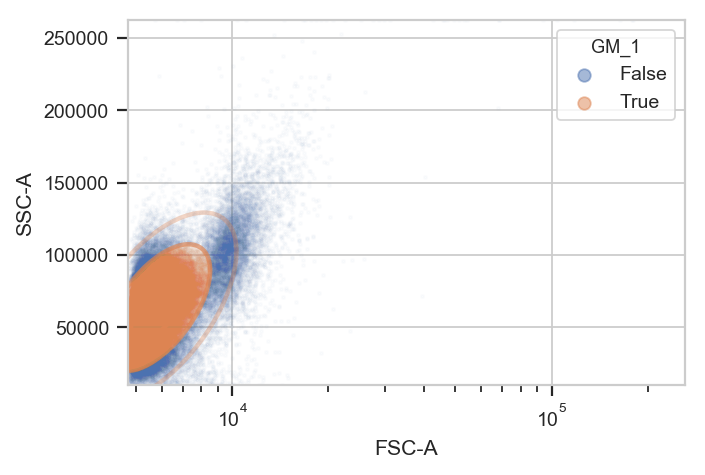

In [20]:
inputs = [
    ["Experiment_Tube_001_001.fcs",0],
 
]

       
tubes = []
for filename, pct in inputs:
    tubes.append(flow.Tube(file = 'data/' + filename, conditions = {'PCT' : pct}))
    
ex = flow.ImportOp(conditions = {'PCT' : 'int'},
                   tubes = tubes).apply()
       

       
r = flow.Range2DOp(name = "Range2D",
                   xchannel = "SSC-W",
                   xlow = 55000,
                   xhigh = 75000,
                   ychannel = "SSC-H",
                   ylow = 5000,
                   yhigh = 250000)
                   
rv = r.default_view(xscale ='linear',yscale='linear')

rv.plot(ex)
ex2 = r.apply(ex)
gm = flow.GaussianMixtureOp(name = "GM",
                            channels = ['FSC-A', 'SSC-A'],
                            scale = {'FSC-A' : 'log',
                                     'SSC-A' : 'linear'},
                            num_components = 1,
                            sigma = 2)
gm.estimate(ex2)
ex_gm = gm.apply(ex2)
gm.default_view().plot(ex_gm, alpha = 0.02)
gm3 = flow.GaussianMixtureOp(name = "GM3",
                            channels = ['FSC-A', 'Pacific Blue-A'],
                            scale = {'FSC-A' : 'log',
                                     'Pacific Blue-A' : 'log'},
                            num_components = 1,
                            sigma = 2)
gm3.estimate(ex_gm)
ex_gm2 = gm3.apply(ex_gm)
df2 =ex_gm2.data
df2 = df2[(df.GM_1==True) & (df2.GM3_1==True) & (df2.Range2D==True) & (df2['FITC-A'] >0)]
mfi = mfi.append(df2.groupby(['PCT'])['FITC-A'].median().reset_index(),ignore_index=True)

# Percent supernatant from E. coli vs mNG intensity

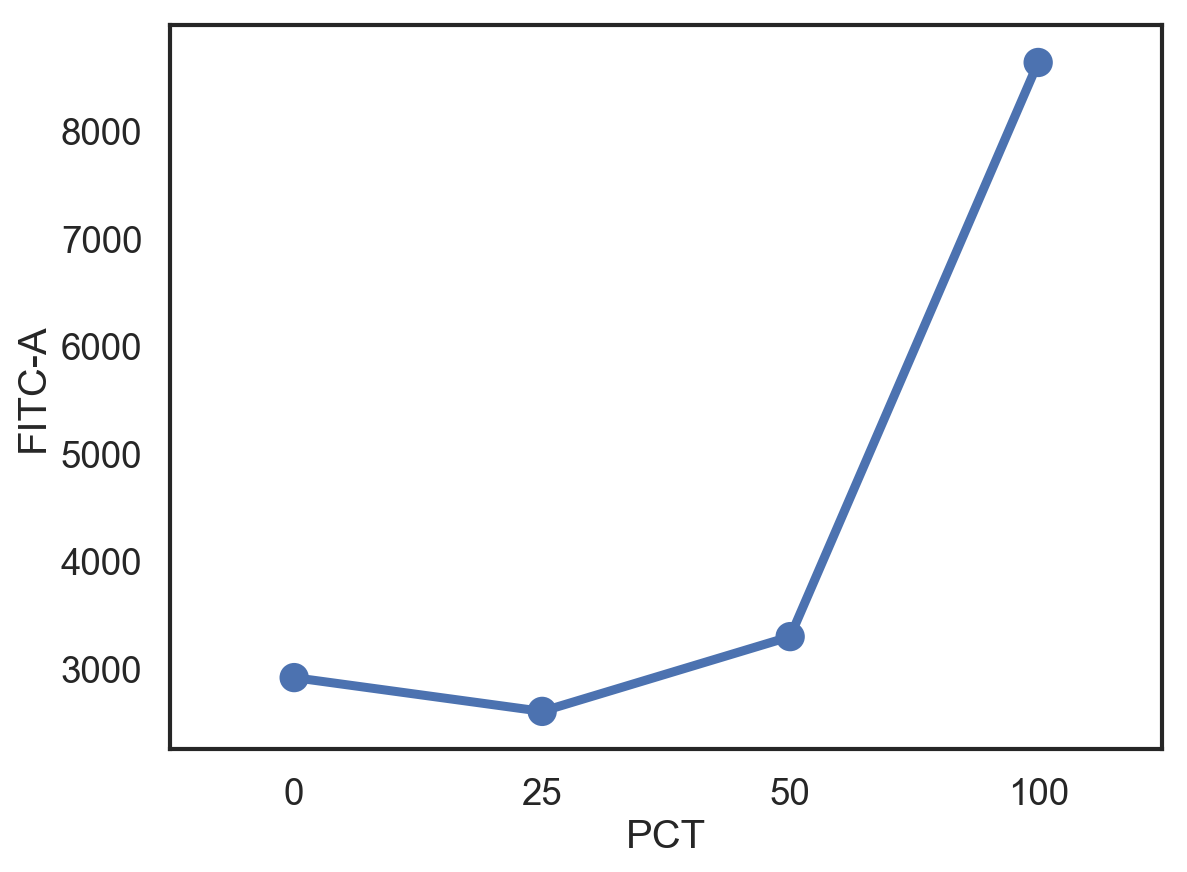

In [23]:
sns.set_context('talk')
sns.set_style('white')
f, ax = plt.subplots(figsize=(8,6))
sns.pointplot(x='PCT',y='FITC-A',data=mfi)

f.savefig('Lux-ec-se.png',dpi=600)

# Percent supernatant from E. coli vs mNG intensity

In [ ]:
data =df.append(df2,ignore_index=True)